In [121]:
! pip install ydata-profiling
! pip install fancyimpute
! pip install scikit-multilearn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [122]:
# Common libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA

# Libraries for Problem Transformation

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

# Libraries for model training

from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score

# Libraries for algorithm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Libraries for testing

from sklearn.metrics import accuracy_score , classification_report

# Removing warnings

import warnings
warnings.filterwarnings('ignore')

# Storing plots

%matplotlib inline

### Importing Required Libraries

In [123]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


import ydata_profiling as dp

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from skmultilearn.problem_transform import BinaryRelevance

from sklearn.metrics import accuracy_score

from fancyimpute import IterativeImputer


# Removing warnings

import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [124]:
features = pd.read_csv("training_set_features.csv")
labels = pd.read_csv("training_set_labels.csv")

In [125]:
features.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...             income_poverty  marital_status  \
0                    1.0  ...              Below Poverty     Not Married   
1                    1.0  ...              Below Poverty     Not Married   
2                    0.0  ...  <= $75,000, Above Poverty     Not Married   
3                    0.0  ...              Below Poverty     Not Married   
4                    1.0  ...  <= $75,000, Above Poverty         Married   

   rent_or_own   employment_status  hhs_geo_region                census_msa  \
0          Own  Not in Labor Force        oxchjgsf                   Non-MSA   
1         Rent            Employed        bhuqouqj  MSA, Not Principle  City   
2          Own            Employed        qufhixun  MSA, Not Principle  City   
3         Rent  Not in Labor Force        lrircsnp       MSA, Principle City   
4          Own            Employed        qufhixun  MSA, Not Principle  City   

   household_adults  household_children  employment_industry  \
0               0.0                 0.0                  NaN   
1               0.0                 0.0             pxcmvdjn   
2               2.0                 0.0             rucpziij   
3               0.0                 0.0                  NaN   
4               1.0                 0.0             wxleyezf   

   employment_occupation  
0                    NaN  
1               xgwztkwe  
2               xtkaffoo  
3                    NaN  
4               emcorrxb  

[5 rows x 36 columns]

In [126]:
labels.head()

respondent_id  h1n1_vaccine  seasonal_vaccine
0              0             0                 0
1              1             0                 1
2              2             0                 0
3              3             0                 1
4              4             0                 0

In [127]:
features.shape

(26707, 36)

In [128]:
labels.shape

(26707, 3)

In [129]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [130]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [131]:
df = pd.merge(features, labels)
profile = dp.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [132]:
features.duplicated().sum()

0

In [133]:
labels.duplicated().sum()

0

In [134]:
features.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [135]:
labels.isnull().sum()

respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

#### Data Preprocessing

### Encoding object datatype

In [136]:
le = LabelEncoder()

for col in features.columns:
    if features[col].dtype == 'object':
        features[col] = le.fit_transform(features[col].astype(str))

### Imputing missing data with MICE impute

In [137]:
features['health_insurance_missing'] = features['health_insurance'].isna().astype(int)
features = features.drop(['health_insurance'], axis=1)

In [138]:
mice_imputer = IterativeImputer()

cols_with_missing = features.columns[features.isna().any()].tolist()

for col in cols_with_missing:
    features[col] = mice_imputer.fit_transform(features[[col]])

In [139]:
features.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

Creating new Column to represent health_insurance because 50% data is missing

In [140]:
# features['health_insurance_missing'] = features['health_insurance'].isna().astype(int)
# features = features.drop(['health_insurance'], axis=1)

In [141]:
features.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...  marital_status  rent_or_own  employment_status  \
0                    1.0  ...               1            0                  1   
1                    1.0  ...               1            1                  0   
2                    0.0  ...               1            0                  0   
3                    0.0  ...               1            1                  1   
4                    1.0  ...               0            0                  0   

   hhs_geo_region  census_msa  household_adults  household_children  \
0               8           2               0.0                 0.0   
1               1           0               0.0                 0.0   
2               9           0               2.0                 0.0   
3               5           1               0.0                 0.0   
4               9           0               1.0                 0.0   

   employment_industry  employment_occupation  health_insurance_missing  
0                   10                     11                         0  
1                   13                     20                         0  
2                   15                     22                         1  
3                   10                     11                         1  
4                   19                      5                         1  

[5 rows x 36 columns]

### Feature Scaling

In [142]:
features.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'health_insurance_missing'],
      dtype='object')

In [143]:
scaler =  MinMaxScaler()

feature_scaled = scaler.fit_transform(features)

In [144]:
feature_scaled = pd.DataFrame(feature_scaled)
feature_scaled.columns = features.columns
feature_scaled

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           0.000000      0.333333             0.0                        0.0   
1           0.000037      1.000000             1.0                        0.0   
2           0.000075      0.333333             0.5                        0.0   
3           0.000112      0.333333             0.5                        0.0   
4           0.000150      0.666667             0.5                        0.0   
...              ...           ...             ...                        ...   
26702       0.999850      0.666667             0.0                        0.0   
26703       0.999888      0.333333             1.0                        0.0   
26704       0.999925      0.666667             1.0                        0.0   
26705       0.999963      0.333333             0.5                        0.0   
26706       1.000000      0.000000             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  ...  marital_status  rent_or_own  \
0                   1.000000  ...             0.5          0.0   
1                   1.000000  ...             0.5          0.5   
2                   0.000000  ...             0.5          0.0   
3                   0.000000  ...             0.5          0.5   
4                   1.000000  ...             0.0          0.0   
...                      ...  ...             ...          ...   
26702               0.000000  ...             0.5          0.0   
26703               0.000000  ...             0.5          0.5   
26704               1.000000  ...             0.5          0.0   
26705               0.677264  ...             0.0          0.5   
26706               0.000000  ...             0.0          0.0   

       employment_status  hhs_geo_region  census_msa  household_adults  \
0               0.333333        0.888889         1.0          0.000000   
1               0.000000        0.111111         0.0          0.000000   
2               0.000000        1.000000         0.0          0.666667   
3               0.333333        0.555556         0.5          0.000000   
4               0.000000        1.000000         0.0          0.333333   
...                  ...             ...         ...               ...   
26702           0.333333        1.000000         1.0 

In [145]:
features.corrwith(labels.h1n1_vaccine)

respondent_id                 -0.003280
h1n1_concern                   0.121747
h1n1_knowledge                 0.117714
behavioral_antiviral_meds      0.040518
behavioral_avoidance           0.047538
behavioral_face_mask           0.070464
behavioral_wash_hands          0.074663
behavioral_large_gatherings    0.017798
behavioral_outside_home        0.021742
behavioral_touch_face          0.071518
doctor_recc_h1n1               0.384662
doctor_recc_seasonal           0.204946
chronic_med_condition          0.093612
child_under_6_months           0.066045
health_worker                  0.167490
opinion_h1n1_vacc_effective    0.267491
opinion_h1n1_risk              0.320833
opinion_h1n1_sick_from_vacc    0.074548
opinion_seas_vacc_effective    0.177786
opinion_seas_risk              0.256192
opinion_seas_sick_from_vacc    0.008284
age_group                      0.041074
education                      0.024694
race                           0.041061
sex                           -0.020672


In [146]:
features.corrwith(labels.seasonal_vaccine)

respondent_id                 -0.004652
h1n1_concern                   0.154561
h1n1_knowledge                 0.119889
behavioral_antiviral_meds      0.006268
behavioral_avoidance           0.076096
behavioral_face_mask           0.050065
behavioral_wash_hands          0.112327
behavioral_large_gatherings    0.063920
behavioral_outside_home        0.053426
behavioral_touch_face          0.119938
doctor_recc_h1n1               0.190631
doctor_recc_seasonal           0.354363
chronic_med_condition          0.167116
child_under_6_months           0.011914
health_worker                  0.125423
opinion_h1n1_vacc_effective    0.203601
opinion_h1n1_risk              0.215083
opinion_h1n1_sick_from_vacc    0.027206
opinion_seas_vacc_effective    0.358802
opinion_seas_risk              0.386410
opinion_seas_sick_from_vacc   -0.060906
age_group                      0.277454
education                      0.002024
race                           0.101743
sex                           -0.077091


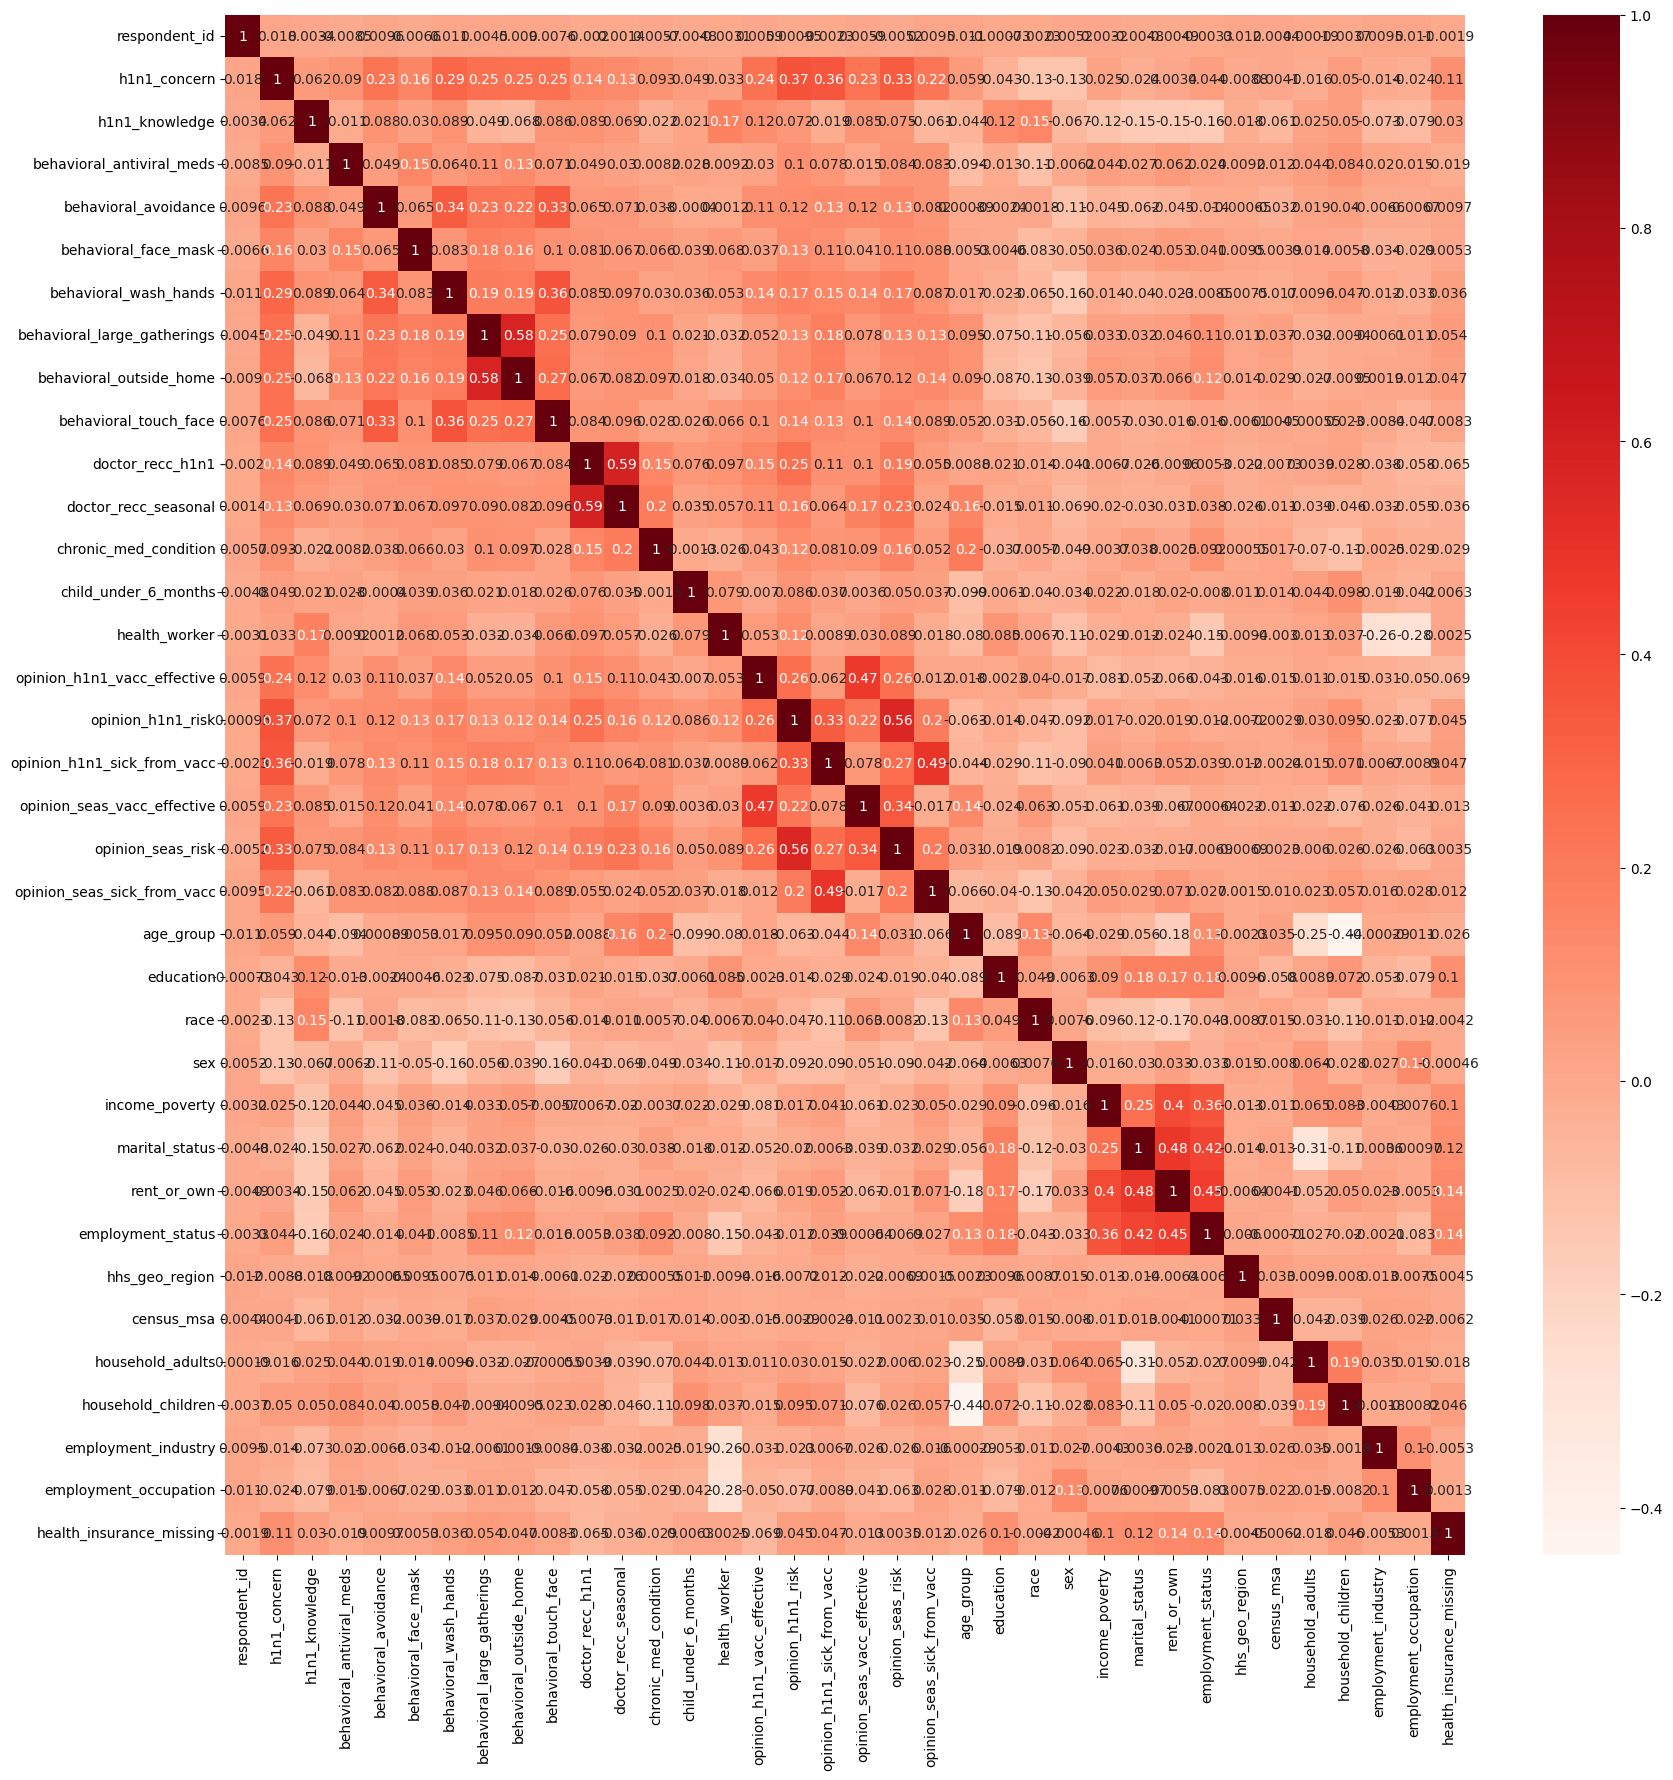

In [147]:
corrmat = features.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
# heat map
g=sns.heatmap(features[top_corr_features].corr(),annot=True,cmap="Reds")


### Modeling

In [148]:
# EXPERIMENT WITH DROPPED COLUMNS
X = feature_scaled.drop(["employment_industry","employment_occupation", "hhs_geo_region", "respondent_id",
                       "h1n1_concern", "h1n1_knowledge"], axis=1)

#X = feature_scaled.drop(["employment_industry","employment_occupation", "hhs_geo_region", "respondent_id", 
#                           'opinion_seas_sick_from_vacc','education','census_msa', 'household_adults',
#                           'behavioral_antiviral_meds', 'h1n1_concern', 'h1n1_knowledge'], axis=1)
y = labels.drop(['respondent_id'], axis=1)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state= 25)

### Using Binary relevance - Logistic Regression

In [150]:
model_LR = BinaryRelevance(LogisticRegression())

# modeling
model_LR.fit(X_train, y_train)

BinaryRelevance(classifier=LogisticRegression(), require_dense=[True, True])

In [151]:
y_pred_LR = model_LR.predict(X_test)

In [152]:
# ignore aja ini 
# trainscore = model.score(X_train, y_train)
# testscore = model.score(X_test, y_test)

In [153]:
BR_LR = accuracy_score(y_test, y_pred_LR)
BR_LR

0.683888680893548

### Using BInary Relevance - Decision Tree

In [154]:
model_DT = BinaryRelevance(DecisionTreeClassifier())

# modeling
model_DT.fit(X_train, y_train)

BinaryRelevance(classifier=DecisionTreeClassifier(), require_dense=[True, True])

In [155]:
y_pred_DT = model_DT.predict(X_test)

In [156]:
BR_DT = accuracy_score(y_test, y_pred_DT)
BR_DT

0.5409958816922501

### Random Forest

In [157]:
model_RF = RandomForestClassifier()

# modeling
model_RF.fit(X_train, y_train)

RandomForestClassifier()

In [158]:
y_pred_RF = model_RF.predict(X_test)

In [159]:
BR_RF = accuracy_score(y_test, y_pred_RF)
BR_RF

0.6815175340072382

### testing pake Logisitic regression

In [160]:
test_data = pd.read_csv("test_set_features.csv")
test_data = test_data.drop(["employment_industry","employment_occupation", "hhs_geo_region", "respondent_id",
                       "h1n1_concern", "h1n1_knowledge"], axis=1)


#test_data = test_data.drop(['race','child_under_6_months','opinion_h1n1_sick_from_vacc','opinion_seas_sick_from_vacc',
#                            'household_adults','behavioral_antiviral_meds','behavioral_large_gatherings', 
#                            'behavioral_outside_home', 'behavioral_antiviral_meds','marital_status', 'behavioral_avoidance',
#                            'behavioral_face_mask','income_poverty','hhs_geo_region','employment_status','education',
#                            'census_msa', "respondent_id", "h1n1_concern", "h1n1_knowledge"], axis=1)


for col in test_data.columns:
    # check if column data type is object
    if test_data[col].dtype == 'object':
        # apply label encoding
        test_data[col] = le.fit_transform(test_data[col].astype(str))

        
test_data['health_insurance_missing'] = test_data['health_insurance'].isna().astype(int)
test_data = test_data.drop(['health_insurance'], axis=1)

from fancyimpute import IterativeImputer

cols_with_missing = test_data.columns[test_data.isna().any()].tolist()

imputer = IterativeImputer()
for col in cols_with_missing:
    test_data[col] = imputer.fit_transform(test_data[[col]])

In [161]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   behavioral_antiviral_meds    26708 non-null  float64
 1   behavioral_avoidance         26708 non-null  float64
 2   behavioral_face_mask         26708 non-null  float64
 3   behavioral_wash_hands        26708 non-null  float64
 4   behavioral_large_gatherings  26708 non-null  float64
 5   behavioral_outside_home      26708 non-null  float64
 6   behavioral_touch_face        26708 non-null  float64
 7   doctor_recc_h1n1             26708 non-null  float64
 8   doctor_recc_seasonal         26708 non-null  float64
 9   chronic_med_condition        26708 non-null  float64
 10  child_under_6_months         26708 non-null  float64
 11  health_worker                26708 non-null  float64
 12  opinion_h1n1_vacc_effective  26708 non-null  float64
 13  opinion_h1n1_ris

In [162]:
features.columns

scaler =  MinMaxScaler()

test_data_scaled = scaler.fit_transform(test_data)

test_data_scaled = pd.DataFrame(test_data_scaled)
test_data_scaled.columns = test_data.columns
test_data_scaled

behavioral_antiviral_meds  behavioral_avoidance  behavioral_face_mask  \
0                            0.0                   1.0                   0.0   
1                            0.0                   0.0                   0.0   
2                            0.0                   0.0                   1.0   
3                            0.0                   0.0                   0.0   
4                            1.0                   1.0                   0.0   
...                          ...                   ...                   ...   
26703                        0.0                   1.0                   0.0   
26704                        0.0                   1.0                   0.0   
26705                        0.0                   0.0                   0.0   
26706                        0.0                   1.0                   0.0   
26707                        0.0                   0.0                   0.0   

       behavioral_wash_hands  behavioral_large_gatherings  \
0                        1.0                          1.0   
1                        0.0                          0.0   
2                        1.0                          1.0   
3                        0.0                          0.0   
4                        1.0                          1.0   
...                      ...                          ...   
26703                    1.0                          0.0   
26704                    1.0                          1.0   
26705                    0.0                          0.0   
26706                    1.0                          0.0   
26707                    1.0                          0.0   

       behavioral_outside_home  behavioral_touch_face  doctor_recc_h1n1  \
0                          0.0                    1.0               0.0   
1                          0.0                    0.0               0.0   
2                          1.0                    1.0               0.0   
3                          0.0                    0.0               1.0   
4                          1.0                    1.0               0.0   
...                        ...                    ...               ...   
26703                      0.0                    1.0               1.0   
26704                      1.0                    1.0               0.0   
26705                      0.0                    0.0               0.0   
26706                      1.0                    0.0               0.0   
26707                      0.0                    1.0               1.0   

       doctor_recc_seasonal  chronic_med_condition  ...      race  sex  \
0                       0.0                    0.0  ...  0.333333  0.0   
1                       0.0                    0.0  ...  1.000000  1.0   
2                       0.0                    0.0  ...  1.000000  1.0   
3                       1.0                    1.0  ...  1.000000  0.0   
4                       0.0                    0.0  ...  0.000000  0.0   
...                     ...                    ...  ...       ...  ...   
26703                   1.0                    0.0  ...  1.000000  0.0   
26704                   0.0                    0.0  ...  1.000000  1.0   
26705                   0.0                    0.0  ...  1.000000  0.0   
26706                   0.0                    0.0  ...  1.000000  0.0   
26707                   0.0                    0.0  ...  1.000000  0.0   

       income_poverty  marital_status  rent_or_own  employment_status  \
0            0.333333             0.5          0.5           0.000000   
1            0.666667             0.5          0.5           0.000000   
2            0.333333             0.0          0.0           0.000000   
3            0.000000             0.0          0.0           0.333333   
4            0.000000             0.5          0.0           0.000000   
...               ...             ...          ...                ...   
26703       

In [163]:
vaccines = model_LR.predict(test_data_scaled)

In [164]:
vaccines

<26708x2 sparse matrix of type '<class 'numpy.int64'>'
	with 15280 stored elements in Compressed Sparse Column format>

In [165]:
testdf = pd.DataFrame(vaccines.toarray(), columns=['h1n1_vaccine', 'seasonal_vaccine'])

In [166]:
testdf = pd.DataFrame(vaccines, columns=['h1n1_vaccine', 'seasonal_vaccine']) # -> RF only

ValueError: Shape of passed values is (26708, 1), indices imply (26708, 2)

In [167]:
testdf

h1n1_vaccine  seasonal_vaccine
0                 0                 0
1                 0                 0
2                 0                 1
3                 0                 1
4                 0                 0
...             ...               ...
26703             0                 0
26704             0                 0
26705             0                 0
26706             0                 0
26707             1                 1

[26708 rows x 2 columns]

In [ ]:
profile = dp.ProfileReport(testdf)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
rows_id = pd.read_csv("test_set_features.csv")

In [ ]:
new_col = rows_id['respondent_id'].reset_index(drop=True)
merged_df = pd.concat([new_col, testdf], axis=1)

In [ ]:
merged_df

respondent_id  h1n1_vaccine  seasonal_vaccine
0              26707             0                 0
1              26708             0                 0
2              26709             0                 1
3              26710             0                 1
4              26711             0                 0
...              ...           ...               ...
26703          53410             0                 0
26704          53411             0                 0
26705          53412             0                 0
26706          53413             0                 0
26707          53414             1                 1

[26708 rows x 3 columns]

In [ ]:
merged_df.to_csv('submission_RF_Default.csv', index=False)

In [ ]:
cross_check = pd.read_csv("training_set_labels.csv")
profile = dp.ProfileReport(cross_check)
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
cross_check = pd.read_csv("submission2.csv")
profile = dp.ProfileReport(cross_check)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
cross_merged = pd.merge(merged_df, cross_check, on = "respondent_id")
cross_merged

respondent_id  h1n1_vaccine_x  seasonal_vaccine_x  h1n1_vaccine_y  \
0              26707               0                   0               0   
1              26708               0                   0               0   
2              26709               0                   1               0   
3              26710               0                   1               0   
4              26711               0                   0               0   
...              ...             ...                 ...             ...   
26703          53410               0                   0               0   
26704          53411               0                   0               0   
26705          53412               0                   0               0   
26706          53413               0                   0               0   
26707          53414               1                   1               0   

       seasonal_vaccine_y  
0                       0  
1                       0  
2                       1  
3                       1  
4                       0  
...                   ...  
26703                   0  
26704                   0  
26705                   0  
26706                   0  
26707                   0  

[26708 rows x 5 columns]

In [ ]:
correct_predictions = (cross_merged['h1n1_vaccine_x'] == cross_merged['h1n1_vaccine_y']).sum()
incorrect_predictions = (cross_merged['h1n1_vaccine_x'] != cross_merged['seasonal_vaccine_y']).sum()

accuracy = correct_predictions / len(merged_df)
accuracy

## ah tai

0.8950127302680845